Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def find_highest_frequency_word_length(string):
    # Split the string into words
    words = string.split()

    # Count the frequency of each word
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

    # Find the maximum frequency
    max_frequency = max(word_frequency.values())

    # Find the length of the highest-frequency word
    highest_frequency_word_length = max(len(word) for word, frequency in word_frequency.items() if frequency == max_frequency)

    return highest_frequency_word_length


In [2]:
string = "Hello Hello Hello world world world world world"
print(find_highest_frequency_word_length(string))


5


In [3]:
string = "A A A B C C C C D D D D D D"
print(find_highest_frequency_word_length(string))


1


Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [4]:
from collections import Counter

def is_valid_string(s):
    # Count the frequency of each character in the string
    char_frequency = Counter(s)

    # Count the frequency of frequencies
    frequency_frequency = Counter(char_frequency.values())

    # If there is only one frequency, the string is valid
    if len(frequency_frequency) == 1:
        return "YES"

    # If there are more than two frequencies, the string is not valid
    if len(frequency_frequency) > 2:
        return "NO"

    # If there are two frequencies
    frequencies = list(frequency_frequency.keys())
    frequency1, frequency2 = frequencies[0], frequencies[1]
    count1, count2 = frequency_frequency.values()

    # If one of the frequencies occurs only once and is equal to 1, the string is valid
    if (count1 == 1 and frequency1 == 1) or (count2 == 1 and frequency2 == 1):
        return "YES"

    # If the difference between the frequencies is 1 and one of them occurs only once, the string is valid
    if abs(frequency1 - frequency2) == 1 and (count1 == 1 or count2 == 1):
        return "YES"

    # Otherwise, the string is not valid
    return "NO"


In [5]:
s1 = "abc"
print(is_valid_string(s1))  # Output: YES

s2 = "abcc"
print(is_valid_string(s2))  # Output: NO


YES
YES


In [7]:
s3 = "aabbccddee"
print(is_valid_string(s3))  # Output: YES


YES


Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [13]:
import requests
import json
import pandas as pd

def download_data(url):
    # Send a GET request to download the data from the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Return the JSON data
        return response.json()
    else:
        # Print an error message if the request failed
        print("Failed to download data.")
        return None

def process_data(data):
    # Extract the necessary attributes from the JSON data
    processed_data = []
    for pokemon in data["pokemon"]:
        processed_data.append({
            "ID": pokemon["id"],
            "Number": pokemon["num"],
            "Name": pokemon["name"],
            "Image": pokemon["img"],
            "Type": ", ".join(pokemon["type"]),
            "Height": pokemon["height"],
            "Weight": pokemon["weight"],
            "Candy": pokemon.get("candy", ""),
            "Candy Count": pokemon.get("candy_count", 0),
            "Egg": pokemon.get("egg", ""),
            "Spawn Chance": pokemon.get("spawn_chance", 0),
            "Average Spawns": pokemon.get("avg_spawns", 0),
            "Spawn Time": pokemon.get("spawn_time", ""),
            "Weaknesses": ", ".join(pokemon.get("weaknesses", [])),
            "Next Evolution": [evolution["name"] for evolution in pokemon.get("next_evolution", [])],
            "Previous Evolution": [evolution["name"] for evolution in pokemon.get("prev_evolution", [])]
        })

    return processed_data

def save_to_excel(data, filename):
    # Convert the processed data to a Pandas DataFrame
    df = pd.DataFrame(data)

    # Save the DataFrame to an Excel file
    df.to_excel(filename, index=False)

# Define the URL of the data source
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Download the data
data = download_data(url)

# Process the data
processed_data = process_data(data)

# Save the processed data to an Excel file
save_to_excel(processed_data, "pokemon_data.xlsx")


In [14]:
data

{'pokemon': [{'id': 1,
   'num': '001',
   'name': 'Bulbasaur',
   'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
   'type': ['Grass', 'Poison'],
   'height': '0.71 m',
   'weight': '6.9 kg',
   'candy': 'Bulbasaur Candy',
   'candy_count': 25,
   'egg': '2 km',
   'spawn_chance': 0.69,
   'avg_spawns': 69,
   'spawn_time': '20:00',
   'multipliers': [1.58],
   'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
   'next_evolution': [{'num': '002', 'name': 'Ivysaur'},
    {'num': '003', 'name': 'Venusaur'}]},
  {'id': 2,
   'num': '002',
   'name': 'Ivysaur',
   'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
   'type': ['Grass', 'Poison'],
   'height': '0.99 m',
   'weight': '13.0 kg',
   'candy': 'Bulbasaur Candy',
   'candy_count': 100,
   'egg': 'Not in Eggs',
   'spawn_chance': 0.042,
   'avg_spawns': 4.2,
   'spawn_time': '07:00',
   'multipliers': [1.2, 1.6],
   'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
   'prev_evolution': [{'num': '001', 'name'

Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.

Sample Data -

Excepted Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int

In [3]:
import requests
import csv

# Function to download the data from the given URL
def download_data(url):
    response = requests.get(url)
    return response.json()

# Function to convert the data into the desired structure
# Function to convert the data into the desired structure
def process_data(data):
    processed_data = []
    for item in data:
        meteorite = {
            'id': item['id'],
            'nametype': item['nametype'],
            'recclass': item['recclass'],
            'mass': float(item['mass (g)']) if 'mass (g)' in item and item['mass (g)'] is not None else None,
            'year': item['year'][0:4] if 'year' in item and item['year'] is not None else None,
            'reclat': float(item['reclat']) if 'reclat' in item and item['reclat'] is not None else None,
            'reclong': float(item['reclong']) if 'reclong' in item and item['reclong'] is not None else None,
            'coordinates': [
                int(item['geolocation']['latitude']) if 'geolocation' in item and 'latitude' in item['geolocation'] and item['geolocation']['latitude'] is not None else None,
                int(item['geolocation']['longitude']) if 'geolocation' in item and 'longitude' in item['geolocation'] and item['geolocation']['longitude'] is not None else None
            ]
        }
        processed_data.append(meteorite)
    return processed_data


# Function to save the data as a CSV file
def save_as_csv(data, filename):
    keys = ['id', 'nametype', 'recclass', 'mass', 'year', 'reclat', 'reclong', 'coordinates']
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=keys)
        writer.writeheader()
        writer.writerows(data)

# Main program
if __name__ == '__main__':
    data_url = 'https://data.nasa.gov/resource/y77d-th95.json'
    output_file = 'meteorites.csv'

    # Download the data
    print('Downloading data...')
    meteorite_data = download_data(data_url)
    print('Data downloaded successfully.')

    # Process the data
    print('Processing data...')
    processed_data = process_data(meteorite_data)
    print('Data processed successfully.')

    # Save the data as a CSV file
    print('Saving data as CSV...')
    save_as_csv(processed_data, output_file)
    print(f'Data saved as CSV file: {output_file}')


Data downloaded successfully.
Processing data...
Data processed successfully.
Saving data as CSV...
Data saved as CSV file: meteorites.csv


In [4]:
import requests

# Function to download data from the API
def download_data(url):
    response = requests.get(url)
    return response.json()

# Function to extract the required data
def extract_data(data):
    show_info = {
        'id': data['id'],
        'url': data['url'],
        'name': data['name'],
    }

    episodes = []
    for episode in data['_embedded']['episodes']:
        episode_data = {
            'season': episode['season'],
            'number': episode['number'],
            'type': episode['type'],
            'airdate': episode['airdate'],
            'airtime': episode['airtime'],
            'runtime': episode['runtime'],
            'average_rating': episode['rating']['average'],
            'summary': episode['summary'].strip('<p>').strip('</p>'),
            'medium_image': episode['image']['medium'],
            'original_image': episode['image']['original']
        }
        episodes.append(episode_data)

    return show_info, episodes

# Main program
if __name__ == '__main__':
    api_url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

    # Download data from the API
    print('Downloading data...')
    api_data = download_data(api_url)
    print('Data downloaded successfully.')

    # Extract the required data
    print('Extracting data...')
    show_info, episode_data = extract_data(api_data)
    print('Data extracted successfully.')

    # Print the extracted data
    print('Show Information:')
    print(show_info)
    print('\nEpisodes:')
    for episode in episode_data:
        print(episode)


Data downloaded successfully.
Extracting data...
Data extracted successfully.
Show Information:
{'id': 1371, 'url': 'https://www.tvmaze.com/shows/1371/westworld', 'name': 'Westworld'}

Episodes:
{'season': 1, 'number': 1, 'type': 'regular', 'airdate': '2016-10-02', 'airtime': '21:00', 'runtime': 68, 'average_rating': 8, 'summary': "A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.", 'medium_image': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg', 'original_image': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}
{'season': 1, 'number': 2, 'type': 'regular', 'airdate': '2016-10-09', 'airtime': '21:00', 'runtime': 60, 'average_rating': 7.7, 'summary': 'Bernard suspects

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

Data downloaded successfully.
Analyzing data...
Analysis completed.


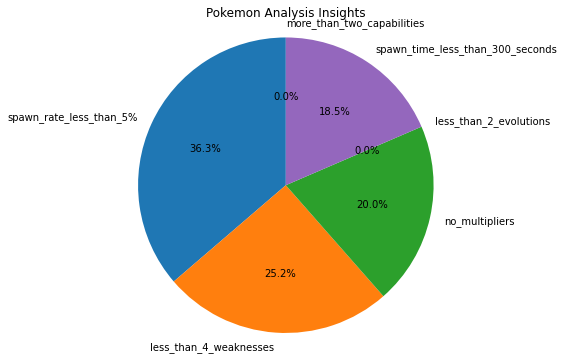

In [8]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the API
def download_data(url):
    response = requests.get(url)
    return response.json()

# Function to analyze the data and provide insights
def analyze_data(data):
    spawn_rate_less_than_5 = []
    less_than_4_weaknesses = []
    no_multipliers = []
    less_than_2_evolutions = []
    spawn_time_less_than_300 = []
    more_than_two_capabilities = []

    for pokemon in data:
        if float(pokemon['spawn_chance']) < 5:
            spawn_rate_less_than_5.append(pokemon['name'])

        if len(pokemon['weaknesses']) < 4:
            less_than_4_weaknesses.append(pokemon['name'])

        if not pokemon.get('multipliers'):
            no_multipliers.append(pokemon['name'])

        if pokemon.get('evolution') and len(pokemon['evolution']['next_evolution']) <= 2:
            less_than_2_evolutions.append(pokemon['name'])

        spawn_time = pokemon['spawn_time']
        if spawn_time != 'N/A':
            minutes, seconds = map(int, spawn_time.split(':'))
            spawn_time_in_seconds = minutes * 60 + seconds
            if spawn_time_in_seconds < 300:
                spawn_time_less_than_300.append(pokemon['name'])

        if len(pokemon['type']) > 2:
            more_than_two_capabilities.append(pokemon['name'])

    insights = {
        'spawn_rate_less_than_5%': spawn_rate_less_than_5,
        'less_than_4_weaknesses': less_than_4_weaknesses,
        'no_multipliers': no_multipliers,
        'less_than_2_evolutions': less_than_2_evolutions,
        'spawn_time_less_than_300_seconds': spawn_time_less_than_300,
        'more_than_two_capabilities': more_than_two_capabilities
    }

    return insights

# Function to plot the analysis insights
def plot_analysis(insights):
    labels = insights.keys()
    sizes = [len(value) for value in insights.values()]

    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pokemon Analysis Insights')
    plt.show()

# Main program
if __name__ == '__main__':
    api_url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'

    # Download data from the API
    print('Downloading data...')
    api_data = download_data(api_url)
    print('Data downloaded successfully.')

    # Analyze the data and extract insights
    print('Analyzing data...')
    analysis_insights = analyze_data(api_data['pokemon'])
    print('Analysis completed.')

    # Plot the analysis insights
    plot_analysis(analysis_insights)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from CSV file
def load_data(filename):
    return pd.read_csv(filename)

# Function to analyze the data and provide insights
def analyze_data(data):
    meteorites_before_2000 = data[data['year'].str[:4].astype(float) < 2000]['Name of Earth Meteorite'].tolist()
    coordinates_before_1970 = data[data['year'].str[:4].astype(float) < 1970][['reclat', 'reclong']]
    mass_above_10000kg = data[data['mass'].notnull() & (data['mass'] > 10000)]['Name of Earth Meteorite'].tolist()

    insights = {
        'meteorites_before_2000': meteorites_before_2000,
        'coordinates_before_1970': coordinates_before_1970,
        'mass_above_10000kg': mass_above_10000kg
    }

    return insights

# Function to plot the analysis insights
def plot_analysis(insights):
    labels = insights.keys()
    sizes = [len(value) for value in insights.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, sizes)
    plt.title('Meteorite Analysis Insights')
    plt.xlabel('Insights')
    plt.ylabel('Count')
    plt.show()

# Main program
if __name__ == '__main__':
    filename = 'meteorite_data.csv'

    # Load data from the CSV file
    print('Loading data...')
    data = load_data(filename)
    print('Data loaded successfully.')

    # Analyze the data and extract insights
    print('Analyzing data...')
    analysis_insights = analyze_data(data)
    print('Analysis completed.')

    # Plot the analysis insights
    plot_analysis(analysis_insights)


Loading data...


FileNotFoundError: [Errno 2] No such file or directory: 'meteorite_data.csv'

Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data science\\Assignment of class\\PRE\\Electric_Vehicle_Population_Data.csv')

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_qualifying_cars = data[data['Fuel Type'] == 'Non-qualifying']
non_qualifying_cars_info = non_qualifying_cars[['Make', 'Model', 'Fuel Type']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars_info)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars_bothell[['Model Year', 'Model Type']]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_info)

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_range_100 = data[(data['Electric Range (km)'] > 100) & (data['Model Year'] > 2015)]
electric_cars_info = electric_cars_range_100[['Make', 'Model', 'Electric Range (km)', 'Model Year']]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_cars_info)

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10, 6))
data.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.show()


KeyError: 'Fuel Type'

Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [15]:
import spacy

def count_pos_tags(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    
    pos_counts = {
        'NOUN': 0,
        'VERB': 0,
        'PRON': 0,
        'ADJ': 0
    }
    
    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1
    
    return pos_counts

# Example usage
text = "The quick brown fox jumps over the lazy dog"
result = count_pos_tags(text)
print(result)

# Additional test case 1
text2 = "She walks in beauty, like the night"
result2 = count_pos_tags(text2)
print(result2)

# Additional test case 2
text3 = "I am the master of my fate, I am the captain of my soul"
result3 = count_pos_tags(text3)
print(result3)


ModuleNotFoundError: No module named 'spacy'